In [35]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd 
import requests

In [36]:
total_df = pd.read_csv("all_char.csv")


In [37]:
total_df.head()

,sequence,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
0,MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...,529,59138.7350,-0.611153,58.945936,0.058601,0.088847,0.024575,0.045369,0.085066,...,0.041588,0.085066,0.039698,0.069943,0.077505,0.039698,0.064272,0.011342,0.011342,1
1,MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...,170,19301.1649,-0.441765,37.586471,0.064706,0.041176,0.023529,0.094118,0.035294,...,0.029412,0.052941,0.041176,0.088235,0.064706,0.058824,0.064706,0.005882,0.011765,1
2,MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...,107,12298.1162,-0.919626,46.321495,0.037383,0.074766,0.009346,0.018692,0.065421,...,0.056075,0.065421,0.065421,0.121495,0.074766,0.037383,0.046729,0.018692,0.018692,1
3,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105,11832.6058,-0.875238,15.507619,0.085714,0.057143,0.019048,0.028571,0.085714,...,0.047619,0.038095,0.028571,0.019048,0.000000,0.095238,0.028571,0.009524,0.038095,1
4,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...,318,35554.0730,-0.583019,43.411950,0.088050,0.084906,0.022013,0.059748,0.075472,...,0.034591,0.066038,0.031447,0.053459,0.062893,0.034591,0.047170,0.022013,0.037736,1


In [38]:
import pandas as pd
import numpy as np

X = total_df.iloc[:,0:5]  #independent columns
y = total_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = total_df.corr()
top_corr_features = corrmat.index

z = total_df[top_corr_features].corr()
z

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,F %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,-0.095965,-0.105601,0.132279,0.058322,0.097919,...,0.224676,0.015549,0.033846,-0.078965,0.056683,-0.141580,0.024012,0.029528,0.101212,0.180052
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,-0.131520,-0.141555,0.153623,0.082895,0.119291,...,0.255748,0.023172,0.049816,-0.066502,0.067214,-0.142050,0.032636,0.038686,0.126238,0.197839
hydrophobicity,-0.041603,-0.077904,1.000000,-0.119240,-0.245899,0.549909,0.555840,-0.378500,-0.427422,-0.048773,...,-0.328244,-0.208821,-0.338622,-0.482454,-0.230300,0.189462,0.026382,-0.134798,-0.304425,-0.096751
instability_index,0.000732,-0.001635,-0.119240,1.000000,-0.102835,-0.035961,0.144863,-0.153864,0.114296,-0.079516,...,-0.135023,0.197184,0.135728,0.263191,0.112621,-0.090775,-0.219134,-0.045841,-0.070713,0.042245
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,-0.404681,-0.394422,0.237863,0.137516,0.725396,...,0.275002,0.152123,0.132273,-0.022250,0.225322,-0.248087,0.104944,0.493840,0.706702,0.047106
A %,-0.095965,-0.131520,0.549909,-0.035961,-0.404681,1.000000,0.347259,-0.312519,-0.316110,-0.283194,...,-0.321907,-0.203692,-0.268404,-0.168976,-0.318108,0.176383,-0.234457,-0.146509,-0.333221,-0.087910
C %,-0.105601,-0.141555,0.555840,0.144863,-0.394422,0.347259,1.000000,-0.383030,-0.377144,-0.309017,...,-0.248789,-0.269675,-0.319696,-0.291511,-0.309242,0.273505,-0.415852,-0.156601,-0.279869,-0.028444
D %,0.132279,0.153623,-0.378500,-0.153864,0.237863,-0.312519,-0.383030,1.000000,0.303137,0.197773,...,0.185905,0.025257,0.119853,0.001211,0.114140,-0.248732,0.175125,0.068403,0.174083,0.057739
E %,0.058322,0.082895,-0.427422,0.114296,0.137516,-0.316110,-0.377144,0.303137,1.000000,0.150609,...,0.054037,0.027524,0.157203,0.119662,-0.026220,-0.317973,0.135769,-0.026721,0.106361,0.060460
F %,0.097919,0.119291,-0.048773,-0.079516,0.725396,-0.283194,-0.309017,0.197773,0.150609,1.000000,...,0.163867,0.113256,0.073628,-0.032460,0.118600,-0.205608,0.084374,0.086869,0.185474,0.038330


In [39]:
z.sort_values(by=['label'], ascending=False)

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,F %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
label,0.180052,0.197839,-0.096751,0.042245,0.047106,-0.087910,-0.028444,0.057739,0.060460,0.038330,...,0.231103,-0.035357,0.003134,-0.053998,0.034512,-0.033222,-0.067829,-0.046159,0.075750,1.000000
N %,0.224676,0.255748,-0.328244,-0.135023,0.275002,-0.321907,-0.248789,0.185905,0.054037,0.163867,...,1.000000,-0.030151,0.121104,-0.116368,0.167696,-0.169511,0.021553,0.072379,0.275623,0.231103
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,-0.131520,-0.141555,0.153623,0.082895,0.119291,...,0.255748,0.023172,0.049816,-0.066502,0.067214,-0.142050,0.032636,0.038686,0.126238,0.197839
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,-0.095965,-0.105601,0.132279,0.058322,0.097919,...,0.224676,0.015549,0.033846,-0.078965,0.056683,-0.141580,0.024012,0.029528,0.101212,0.180052
I %,0.143212,0.169330,-0.075266,-0.058435,0.188025,-0.346266,-0.382223,0.201312,0.241981,0.184125,...,0.298737,-0.009338,0.118778,0.020386,0.074118,-0.252874,0.128977,-0.017117,0.155795,0.113075
K %,-0.000862,0.024312,-0.538148,-0.069701,0.079813,-0.320922,-0.326514,0.074594,0.211514,0.048951,...,0.190547,-0.045158,0.070277,0.190943,0.032776,-0.236967,0.082001,-0.043608,0.122185,0.109043
Y %,0.101212,0.126238,-0.304425,-0.070713,0.706702,-0.333221,-0.279869,0.174083,0.106361,0.185474,...,0.275623,0.079345,0.107464,-0.019052,0.204443,-0.174488,0.076657,0.130186,1.000000,0.075750
E %,0.058322,0.082895,-0.427422,0.114296,0.137516,-0.316110,-0.377144,0.303137,1.000000,0.150609,...,0.054037,0.027524,0.157203,0.119662,-0.026220,-0.317973,0.135769,-0.026721,0.106361,0.060460
D %,0.132279,0.153623,-0.378500,-0.153864,0.237863,-0.312519,-0.383030,1.000000,0.303137,0.197773,...,0.185905,0.025257,0.119853,0.001211,0.114140,-0.248732,0.175125,0.068403,0.174083,0.057739
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,-0.404681,-0.394422,0.237863,0.137516,0.725396,...,0.275002,0.152123,0.132273,-0.022250,0.225322,-0.248087,0.104944,0.493840,0.706702,0.047106


In [40]:
z['label'].nlargest(n=10)

label               1.000000
N %                 0.231103
molecular_weight    0.197839
seq_len             0.180052
I %                 0.113075
K %                 0.109043
Y %                 0.075750
E %                 0.060460
D %                 0.057739
aromaticity         0.047106
Name: label, dtype: float64

In [41]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256797 entries, 0 to 256796
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sequence           256797 non-null  object 
 1   seq_len            256797 non-null  int64  
 2   molecular_weight   256797 non-null  float64
 3   hydrophobicity     256797 non-null  float64
 4   instability_index  256797 non-null  float64
 5   aromaticity        256797 non-null  float64
 6   A %                256797 non-null  float64
 7   C %                256797 non-null  float64
 8   D %                256797 non-null  float64
 9   E %                256797 non-null  float64
 10  F %                256797 non-null  float64
 11  G %                256797 non-null  float64
 12  H %                256797 non-null  float64
 13  I %                256797 non-null  float64
 14  K %                256797 non-null  float64
 15  L %                256797 non-null  float64
 16  M 

In [42]:
# df_model1 = total_df.drop(columns = ['sequence'])
df_model1 = total_df.drop(['sequence', 'A %', 'C %', 'D %', 'E %', 'F %', 'G %', 'H %', 'I %', 'K %', 'L %', 'M %', 'N %', 'P %', 'Q %', 'R %', 'S %', 'T %', 'V %','W %', 'Y %'], axis = 1)


In [43]:
df_model1

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,label
0,529,59138.7350,-0.611153,58.945936,0.058601,1
1,170,19301.1649,-0.441765,37.586471,0.064706,1
2,107,12298.1162,-0.919626,46.321495,0.037383,1
3,105,11832.6058,-0.875238,15.507619,0.085714,1
4,318,35554.0730,-0.583019,43.411950,0.088050,1
...,...,...,...,...,...,...
256792,1218,143057.5679,-0.841461,43.773563,0.067323,1
256793,1193,141223.7597,-0.803101,46.522557,0.078793,1
256794,198,22733.3478,-0.482828,30.806111,0.131313,1
256795,688,77645.7201,-0.627907,41.276323,0.081395,1


In [44]:
import pandas as pd
import numpy as np

X = df_model1.iloc[:,0:5]  #independent columns
y = df_model1.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_model1.corr()
top_corr_features = corrmat.index

z = df_model1[top_corr_features].corr()
z

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,label
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,0.180052
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,0.197839
hydrophobicity,-0.041603,-0.077904,1.000000,-0.119240,-0.245899,-0.096751
instability_index,0.000732,-0.001635,-0.119240,1.000000,-0.102835,0.042245
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,0.047106
label,0.180052,0.197839,-0.096751,0.042245,0.047106,1.000000


In [45]:
z.to_csv('5varCor.csv', index = False)

In [46]:
import plotly.express as px
# plot heatmap
fig = px.imshow(z, text_auto=True)
fig.show()

In [47]:
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            
print(f"COLUMNS is {COLUMNS}\n")  

# a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

PROT_S = ['non-disordered', 'disordered']   # int to str
PROT_INDEX = {'non-disordered': 0,'disordered':1}  # str to int

# Let's try it out...
for name in PROT_S:
    print(f"{name} maps to {PROT_INDEX[name]}")

COLUMNS is Index(['seq_len', 'molecular_weight', 'hydrophobicity', 'instability_index',
       'aromaticity', 'label'],
      dtype='object')

COL_INDEX is {'seq_len': 0, 'molecular_weight': 1, 'hydrophobicity': 2, 'instability_index': 3, 'aromaticity': 4, 'label': 5}


non-disordered maps to 0
disordered maps to 1


In [48]:
A = df_model1.to_numpy()   
A = A.astype('float64')   
print(A)

[[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02  1.00000000e+00]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02  1.00000000e+00]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02  1.00000000e+00]
 ...
 [ 1.98000000e+02  2.27333478e+04 -4.82828283e-01  3.08061111e+01
   1.31313131e-01  1.00000000e+00]
 [ 6.88000000e+02  7.76457201e+04 -6.27906977e-01  4.12763227e+01
   8.13953488e-02  1.00000000e+00]
 [ 1.34100000e+03  1.54797781e+05 -7.61670395e-01  3.42113497e+01
   9.32140194e-02  1.00000000e+00]]


#### splitting the data into ordered/disordered

In [49]:
A = df_model1.to_numpy()   
A = A.astype('float64')   
print(A)
print(f"the shape is {A.shape}")

[[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02  1.00000000e+00]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02  1.00000000e+00]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02  1.00000000e+00]
 ...
 [ 1.98000000e+02  2.27333478e+04 -4.82828283e-01  3.08061111e+01
   1.31313131e-01  1.00000000e+00]
 [ 6.88000000e+02  7.76457201e+04 -6.27906977e-01  4.12763227e+01
   8.13953488e-02  1.00000000e+00]
 [ 1.34100000e+03  1.54797781e+05 -7.61670395e-01  3.42113497e+01
   9.32140194e-02  1.00000000e+00]]
the shape is (256797, 6)


In [50]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:5]  # X (features) ... is all rows, columns 0, 1, 2, 3, 4
y_all = A[:,5]    # y (labels) ... is all rows, column 5 only

print(f"y_all (just the labels) for disordered are \n {y_all}")
print(f"X_all (just the features of the disordered proteins) are \n {X_all[0:5]}")



+++ Start of data definitions +++

y_all (just the labels) for disordered are 
 [1. 1. 1. ... 1. 1. 1.]
X_all (just the features of the disordered proteins) are 
 [[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02]
 [ 1.05000000e+02  1.18326058e+04 -8.75238095e-01  1.55076190e+01
   8.57142857e-02]
 [ 3.18000000e+02  3.55540730e+04 -5.83018868e-01  4.34119497e+01
   8.80503145e-02]]


In [51]:
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
# procedure breaks the relationship between the feature and the target
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print(f"The scrambled disordered protein labels are \n {y_all}")
print(f"The corresponding data rows for disordered protein features are \n {X_all[0:5]}")



The scrambled disordered protein labels are 
 [0. 0. 0. ... 0. 0. 0.]
The corresponding data rows for disordered protein features are 
 [[ 9.90000000e+01  1.07466160e+04  1.78787879e-01  5.00212121e+01
   5.05050505e-02]
 [ 3.88000000e+02  4.07086940e+04  1.67525773e-02  2.76262887e+01
   5.41237113e-02]
 [ 1.26000000e+02  1.39902697e+04 -5.07936508e-02  4.33365079e+01
   3.17460317e-02]
 [ 2.94000000e+02  3.41831490e+04 -1.70408163e-01  4.75861224e+01
   1.25850340e-01]
 [ 2.09000000e+02  2.30313879e+04 -4.14832536e-01  3.47531100e+01
   7.65550239e-02]]


In [52]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)



# 16316 disordered => 0.236 (3852- number of proteins needed in final test set/ 16316)
# 240481 total ordered => 0.0160
# 7704 => 3852 
#split ordered
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)


print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows


training with 205437 rows;  testing with 51360 rows

Held-out data... (testing data: 51360)
y_test: [0. 0. 0. ... 0. 0. 0.]

X_test (few rows): [[ 2.57000000e+02  2.88902555e+04 -5.77431907e-01  2.01112840e+01
   1.05058366e-01]
 [ 1.80000000e+02  2.10480415e+04 -8.64444444e-01  3.04572222e+01
   1.44444444e-01]
 [ 4.70000000e+01  5.44133430e+03 -2.76595745e-02  4.79893617e+01
   1.70212766e-01]
 [ 2.44000000e+02  2.57903857e+04  1.38524590e-01  2.81315574e+01
   4.09836066e-02]
 [ 3.00000000e+00  2.31249000e+02  1.80000000e+00  6.66666667e+00
   0.00000000e+00]]

Data used for modeling... (training data: 205437)
y_train: [0. 0. 0. ... 0. 1. 0.]

X_train (few rows): [[ 2.23000000e+02  2.33050899e+04 -5.96412556e-02  2.22968610e+01
   7.62331839e-02]
 [ 2.30000000e+02  2.44990153e+04 -3.95652174e-02  3.25052609e+01
   7.39130435e-02]
 [ 6.00000000e+00  5.32587700e+02  1.73333333e+00  8.33333333e+00
   0.00000000e+00]
 [ 3.29000000e+02  3.72133127e+04 -2.38905775e-01  5.50525836e+01
   9

In [53]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7), 
                    max_iter=200,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_test,y_test)
print("++++++++++  TRAINING:   end  +++++++++++++++")




++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 0.23886140
Iteration 2, loss = 0.23525558
Iteration 3, loss = 0.23553883
Iteration 4, loss = 0.23540217
Iteration 5, loss = 0.23545351
Iteration 6, loss = 0.23549456
Iteration 7, loss = 0.23546172
Iteration 8, loss = 0.23541872
Iteration 9, loss = 0.23546481
Iteration 10, loss = 0.23535867
Iteration 11, loss = 0.23517533
Iteration 12, loss = 0.23546446
Iteration 13, loss = 0.23549881
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 14, loss = 0.23521636
Iteration 15, loss = 0.23513586
Iteration 16, loss = 0.23519094
Iteration 17, loss = 0.23517894
Iteration 18, loss = 0.23510129
Iteration 19, loss = 0.23518292
Iteration 20, loss = 0.23515547
Iteration 21, loss = 0.23516240
Iteration 22, loss = 0.23520098
Iteration 23, loss = 0.23519412
Iteration 24, loss = 0.23513664
Training loss did not improve more than tol=0.000100 for 10 consecutive epoch

In [54]:
# nn_classifier.predict_proba(X_test[:1])
# Return the mean accuracy on the given test data and labels
nn_classifier.predict(X_test[:100, :])
nn_classifier.score(X_test, y_test)


0.9370521806853582

In [55]:
predictions = nn_classifier.predict(X_test)

In [56]:
from sklearn.metrics import f1_score

f1_score(y_test, predictions, average='weighted')

0.9066010694833343

In [57]:
# probability of one or the other
s1 = nn_classifier.predict_proba(X_test)[:, 1]
s1

array([0.06293929, 0.06293929, 0.06293929, ..., 0.06293929, 0.06293929,
       0.06293929])

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, s1)

0.5001766160367361

[hyperparameter optimization](https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b)

In [59]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_test,y_test) # X is train samples and y is the corresponding labels

/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

activation (relu)
+ Activation function for the hidden layer
+ relu = ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

solver (adam)
+ The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

[source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [60]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [61]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.937 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.937 (+/-0.000) 

In [62]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     48127
         1.0       0.00      0.00      0.00      3233

    accuracy                           0.94     51360
   macro avg       0.47      0.50      0.48     51360
weighted avg       0.88      0.94      0.91     51360



/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/elizabethjohnson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [63]:
# 0.9344820872274143
clf.score(X_test, y_test)

0.9370521806853582

In [64]:
predictions = clf.predict(X_test)

In [65]:
f1_score(y_test, predictions, average='weighted')

0.9066010694833343

In [66]:
s1 = clf.predict_proba(X_test)[:, 1]
s1

array([0.06362482, 0.06362482, 0.06362482, ..., 0.06362482, 0.06362482,
       0.06362482])

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, s1)

0.5079309087293401

In [68]:
def find_TP(y, y_hat):
    # counts the number of true positives (y = 1, y_hat = 1)
    return sum((y == 1) & (y_hat == 1))
def find_FN(y, y_hat):
    # counts the number of false negatives (y = 1, y_hat = 0) Type-II error
    return sum((y == 1) & (y_hat == 0))
def find_FP(y, y_hat):
    # counts the number of false positives (y = 0, y_hat = 1) Type-I error
    return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
    # counts the number of true negatives (y = 0, y_hat = 0)
    return sum((y == 0) & (y_hat == 0))

TP = # of proteins correctly identified
FP = # of false positives

P = TP/ (TP + FP)

In [69]:
y = clf.predict(X_test)
TP = find_TP(y, y_test)
FN = find_FN(y, y_test)
FP = find_FP(y, y_test)
TN = find_TN(y, y_test)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
precision = TP/(TP+FP)
print('Precision:',precision)

TP: 0
FN: 0
FP: 3233
TN: 48127
Precision: 0.0


These items don't work LOL

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
# ...         X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

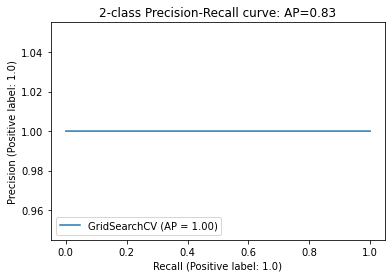

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(clf, X_test, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(precision))

In [ ]:
prediction = clf.predict([[3.54000000e+02, 3.98037461e+04, -4.00564972e-01, 5.96581921e+01,
   7.90960452e-02]])
print(prediction == 0)

[ True]


In [ ]:
# saving the model 
# import pickle 
# pickle_out = open("prot_classifier.pkl", mode = "wb") 
# pickle.dump(clf, pickle_out) 
# pickle_out.close()